Power law parameters: a = 12215.839258154878, b = -1.1604670828257126


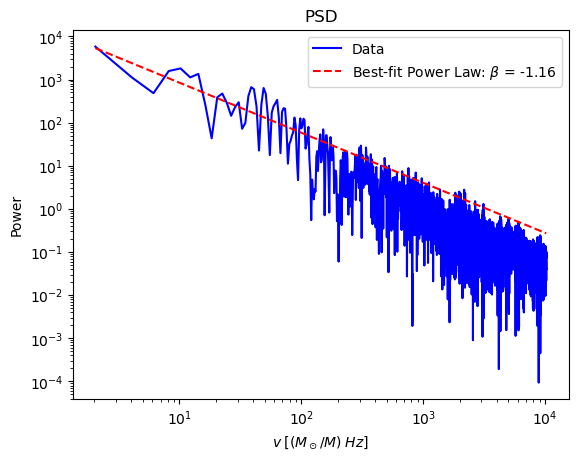

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
mdot = pd.read_csv('mdot.csv', header=None)
radius = mdot.iloc[0, :]
mdot2Rg = mdot.iloc[1:, 17] 

# Time array
t2Rg = np.linspace(0, 100001, len(mdot2Rg)) 
delta_t = t2Rg[1] - t2Rg[0]  

# Fourier Transform
fft2Rg = np.fft.fft(mdot2Rg)
freq = np.fft.fftfreq(len(mdot2Rg), d=delta_t)

# Physical constants
c = 3e8  # Speed of light
G = 6.6473e-11  # Gravitational constant
M_BH = 1.989e30  # Mass of black hole

# Scale frequencies
freq = (freq * c**3) / (G * M_BH)

# Filter for positive frequencies
positive_freq = freq > 0
freq = freq[positive_freq]
fft2Rg = fft2Rg[positive_freq]

# Define power law function
def power_law(x, a, b):
    return a * x**b

# Fit power law
popt, _ = curve_fit(power_law, freq, np.abs(fft2Rg)**2)
a, b = popt
print(f"Power law parameters: a = {a}, b = {b}")

# Generate fitted power law data
fitted_power = power_law(freq, *popt)

# Plot
plt.plot(freq, np.abs(fft2Rg)**2, label="Data", color="blue")
plt.plot(freq, fitted_power, color="red", linestyle="--", 
         label=f"Best-fit Power Law: $\\beta$ = {b:.2f}") 
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$v \; [(M_\odot/M) \; Hz]$')
plt.ylabel('Power')
plt.title('PSD')
plt.legend()
plt.show()

